# Método de Diferencias Finitas
Martínez Ostoa Néstor

#315618648

Métodos Matemáticos Computacionales para Ciencia de Datos

Licenciatura en Ciencia de Datos 

IIMAS, UNAM

Enero del 2021

Este método se basa en el ejemplo de las ecuaciones diferenciales parciales (PDEs) elípticas (capítulo 9 del libro *Numerical Methods for Engineers and Scientists* de Joe Hoffman). Concretamente en el siguiente ejemplo: 

## Ejemplo: Sistemas térmicos

Tenemos dos sistemas térmicos para los cuales queremos conocer su temperatura $T(x,y)$ dado las coordenadas $(x,y)$. La distribución de la temperatura sobre estos sistemas térmicos está gobernada por la ecuación de dos dimensiones de Laplace: $$T_{xx} + T_{yy} = 0$$ más condiciones de frontera especificadas por los bordes del sistema. Para este caso en particular sí se conoce la solución analítica, es decir, la ecuación que dadas dos coordenadas $x,y$, se puede obtener la temperatura del sistema. Sin embargo, el **método de Diferencias Finitas** se aplica cuando no conocemos esta ecuación. Dicha ecuación es la siguiente: $$T(x,y) = 100 \frac{\sinh(\pi y / w)\sin(\pi x/w)}{\sinh (\pi h / w)}$$ En la siguiente celda tenemos los valores al sustituir valores de $x,y$. El ejemplo indica que tenemos una placa con $w=10\; \text{cm}$ de ancho y $h=15\; \text{cm}$ de alto.



In [2]:
import numpy as np 
def analytical_solution(x,y):
    w = 10
    h = 15
    return 100 * ((np.sinh((np.pi*y)/w)*np.sin((np.pi*x)/w))/(np.sinh((np.pi*h)/w)))

for x in [0,1.25,2.5,3.75,5]:
    for y in np.linspace(15,0,13):
        print(f'x={x}\ty={y}\t\tT(x,y)={analytical_solution(x,y)}')
    print()


x=0	y=15.0		T(x,y)=0.0
x=0	y=13.75		T(x,y)=0.0
x=0	y=12.5		T(x,y)=0.0
x=0	y=11.25		T(x,y)=0.0
x=0	y=10.0		T(x,y)=0.0
x=0	y=8.75		T(x,y)=0.0
x=0	y=7.5		T(x,y)=0.0
x=0	y=6.25		T(x,y)=0.0
x=0	y=5.0		T(x,y)=0.0
x=0	y=3.75		T(x,y)=0.0
x=0	y=2.5		T(x,y)=0.0
x=0	y=1.25		T(x,y)=0.0
x=0	y=0.0		T(x,y)=0.0

x=1.25	y=15.0		T(x,y)=38.268343236508976
x=1.25	y=13.75		T(x,y)=25.837517849015125
x=1.25	y=12.5		T(x,y)=17.442631011620794
x=1.25	y=11.25		T(x,y)=11.772362975704958
x=1.25	y=10.0		T(x,y)=7.940991920414657
x=1.25	y=8.75		T(x,y)=5.350040150170044
x=1.25	y=7.5		T(x,y)=3.5947891392951923
x=1.25	y=6.25		T(x,y)=2.4010606458518557
x=1.25	y=5.0		T(x,y)=1.5823888152949586
x=1.25	y=3.75		T(x,y)=1.0108933605112747
x=1.25	y=2.5		T(x,y)=0.5973040756456376
x=1.25	y=1.25		T(x,y)=0.27701642134362275
x=1.25	y=0.0		T(x,y)=0.0

x=2.5	y=15.0		T(x,y)=70.71067811865476
x=2.5	y=13.75		T(x,y)=47.74150782320024
x=2.5	y=12.5		T(x,y)=32.22977956956618
x=2.5	y=11.25		T(x,y)=21.752490405094953
x=2.5	y=10.0		T(x,y)=14.673

## Desarrollo diferencias finitas
Es un método numérico utilizado para resolver ecuaciones diferenciales parciales (PDEs) al **discretizar** el dominio continuo en una malla de pasos discreta. Concretamente, se aproximan las PDEs por medio de aproximaciones en diferencia finitas (FDAs), sustityuendo las FDAs en PDEs y resolviendo la ecuaciones en diferencias finita (FDEs) para la variable dependiente.

### Malla diferencias finitas
Esta malla abarca todo el dominio $D(x,y)$ del problema físico a resolver. La intersección de esta malla son los puntos en los cuales se obtiene la solución en diferencias finitas para la ecuacione diferencial parcial. 

Estas mallas tienen un espaciamiento en $x$ y en $y$, $\Delta x$, $\Delta y$ respectivamente pero **no** necesariamente se cumple que $\Delta x$ sea igual a $ \Delta y$. La función $f(x,y)$ en el punto de la malla $(i,j)$ se denota por $$f(x_i, y_i) = f_{ij}$$ y de manera análoga, las derivadas están denotadas por $\frac{\partial f(x_i, y_i)}{\partial x} = \frac{\partial f}{\partial x}\big |_{ij} = f_x|_{ij}$ y $\frac{\partial² f(x_i, y_i)}{\partial x^2} = \frac{\partial^2 f}{\partial x^2}\big |_{ij} = f_{xx}|_{ij}$

### Aproximaciones de Diferencias Finitas (FDAs)
Ahora, debemos desarrollar aproximaciones de diferencias finitas de las derivadas parciales de las ecuaciones diferenciales parciales. Para logar esto, empleamos la serie de Taylor para la variable dependiente. Antes, debemos dejar en claro la diferencia entre la solución exacta y la solución aproximada: $$\widehat{f}(x,y): \text{solución exacta}$$ $$f(x,y): \text{solución aproximada}$$

Concretamente, la aproximación, por medio del método de malla de diferencias finitas, de las derivadas parciales exactas en el punto de la malla $(i,j)$ se obtiene en términos de los valores de $\widehat{f}$ en el punto $(i,j)$ y puntos adyacentes a él dentro de la malla. 

### Solución de la ecuación de Laplace por medio de diferencias finitas

Para obtener esta solución emplearemos la serie de Taylor. Recordemos que la serie de Taylor de una función $f$ es la siguiente: $$f(x) = f(a) + f'(a)(x-a) + \frac{f''(x)}{2!}(x-a)^2 + \cdots + \frac{f^n(a)}{n!}(x-a)^n$$ y la ecuación de Laplace es la siguiente: $$\widehat{f}_{xx} + \widehat{f}_{yy} = 0$$

### Desarrollo de serie de Taylor para las segundas derivadas
$$ f(x_0 + \Delta x) = f(x_0) + \frac{\partial f(x_0)}{\partial x}\Delta x + \frac{\partial^2 f(x_0)}{\partial x^2}\frac{\Delta x^2}{2!} + \cdots $$
$$ f(x_0 - \Delta x) = f(x_0) - \frac{\partial f(x_0)}{\partial x}\Delta x + \frac{\partial^2 f(x_0)}{\partial x^2}\frac{\Delta x^2}{2!} + \cdots $$
$$ f(x_0 + \Delta x) + f(x_0 - \Delta x) = 2f(x_0) + \frac{2\partial^2f(x_0)}{\partial x^2}\frac{\Delta x^2}{2!} $$
$$ \frac{\partial^2f(x_0)}{\partial x^2} = \frac{f(x_0 + \Delta x) -2f(x_0) +f(x_0 - \Delta x)}{\Delta x^2} $$
$$ \frac{\partial^2f(y_0)}{\partial y^2} = \frac{f(y_0 + \Delta y) -2f(y_0) +f(y_0 - \Delta y)}{\Delta y^2} $$
$$ f_{xx}|_{ij} = \frac{f_{i+1j}-2f_{ij}+f_{i-1j}}{\Delta x^2} $$
$$ f_{yy}|_{ij} = \frac{f_{i+1j}-2f_{ij}+f_{i-1j}}{\Delta y^2} $$


### Discretización
Reemplazando $\widehat{f}_{xx}$ y $\widehat{f}_{yy}$ por la segunda derivada respectivamente de $x$ y de $y$, obtenemos: $$\frac{f_{i+1j}-2f_{ij}+f_{i-1j}}{\Delta x^2} + \frac{f_{ij+1}-2f_{ij}+f_{ij-1}}{\Delta y^2} = 0$$ que, al considerar $\beta = \frac{\Delta x}{\Delta y}$, se puede rescribir como: $$f_{i+1j}+\beta^2f_{ij+1}+f_{i-1j}+\beta^2f_{ij-1}-2(1+\beta^2)f_{ij} = 0$$ y al resolver para $f_{ij}$ obtenemos: $$f_{ij} = \frac{f_{i+1j}+\beta^2f_{ij+1}+f_{i-1j}+\beta^2f_{ij-1}}{2(1+\beta^2)}$$ 
que al observar la solución podemos apreciar que la solución para cada punto de la malla depende de los cuatro puntos vecinos a él dentro de la malla. En el caso cuando tengamos $\Delta x = \Delta y$, $\beta = 1$ por lo que tenemos las siguiente ecuaciones: $$f_{ij} = \frac{1}{4}(f_{i+1j}+f_{ij+1}+f_{i-1j}+f_{ij-1})$$ $$f_{i+1j}+f_{ij+1}+f_{i-1j}+f_{ij-1}-4f_{ij}=0$$

No existe una ventaja matemáticamente formal para usar $\beta = 1$, sin embargo, valores de $\beta$ más grandes que la unidad tienden a producir resultados menos certeros que cuando se utiliza un $\beta$ cerca de la vecindad de la unidad. 


# Desarrollo del método de diferencias finitas

El desarrollo de este método numérico fue hecho con Python 3. Recordemos que este método nos regresa una malla de diferencias finitas, el tamaño de esta malla estará determinada por los valores $\Delta x$ y $\Delta y$. Esta malla, concretamente, representa un sistema de ecuaciones del estilo $$Ax = B$$ donde:

- $A$:matriz que representa el sistema de ecuaciones
- $x$: vector solución de temperaturas
- $B$: vector de condiciones de frontera

$$
\begin{bmatrix}
    P_{00} & \cdots & P_{0j} \\
    \vdots & \ddots & \vdots \\ 
    P_{j0} & \cdots & P_{ji}
\end{bmatrix} 
\times 
\begin{bmatrix}
    T_{00} \\ 
    \vdots \\
    T_{ji}
\end{bmatrix}
=
\begin{bmatrix}
    f_{00} \\
    \vdots \\ 
    f_{ji}
\end{bmatrix}
$$
donde: 

- $P_{ji}$: representa el coeficiente del punto $(j,i)$ dentro de la malla
- $T_{ji}$: representa el punto $(j,i)$ dentro de la malla de diferencias finitas
- $f_{ji}$: representa el valor de la condición de frontera para el punto $(j,i)$

El método de diferencias finitas termina cuando encontramos la matriz $A$ y el vector $B$, sin embargo, para obtener los valores del vector $x$, necesitamos aplicar otro métood para resolver el sistema de ecuaciones. Los métodos empleados en este reporte fueron: 

1. **Método directo**: elminación gaussiana
2. **Método iterativo**: Gauss-Seidel

## Librerías utilizadas

In [2]:
import numpy as np
import copy
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

## Método directo: Eliminación gausiana

In [3]:
def swap(row, A):
  pr = -1
  if row < len(A) - 1:
    for i in range(row + 1, len(A)):
      if A[i][row] != 0:
        pr = i
        break
  else:
    return A
  x = A.pop(row)
  y = A.pop(pr - 1)
  A.insert(row, y)
  A.insert(pr, x)
  return A

def norm(row, A):
  r = A[row]
  e = r[row]
  for i in range(0, len(r)):
    r[i] /= e 
  return A

def operate(row, A):
  for i in range(row + 1, len(A)):
    e = A[i][row] * (-1)
    for j in range(0, len(A[row])):
      A[i][j] += A[row][j] * e
  return A

def solve(A):
    X = [A[A.shape[0]-1][-1]]
    sol_index = -2
    for row in range(A.shape[0]-2,-1,-1):
        stored_sol_idx = sum_ = 0
        for sol_col in range(-1, sol_index-1, -1):
            if sol_col == -1:
                sum_ += A[row][sol_col]
                continue
            sum_ -= A[row][sol_col]*X[stored_sol_idx]
            stored_sol_idx += 1
        X.append(sum_)
        sol_index -= 1
    return np.array(X)[::-1]

def solve_gauss(A, B=None):
    if B is not None:
        A = np.append(A, B, axis=1)
    for i in range(len(A)):
        element = A[i][i]
        if element == 0:
            A = swap(i, A)
            element = A[i][i]
        A = norm(i, A)
        A = operate(i, A)
    return solve(A)

## Método iterativo: Gauss-Seidel

In [4]:
def solve_for_row(A, seed):
    for row in range(A.shape[0]):
        sum_ = A[row][-1]
        div_number = 0
        for col in range(A.shape[1]-1):
            if row == col:
                div_number = A[row][col]
                continue
            sum_ -= A[row][col] * seed[col]
        sum_ /= div_number
        seed[row] = sum_
    return seed

def get_error(old_seed, new_seed):
    abs_vector = []
    for i in range(len(old_seed)):
        abs_vector.append(abs(old_seed[i]-new_seed[i]))
    return max(abs_vector)
    
def solve_gauss_seidel(A, B, min_error=10e-4, verbose=False):
    A = np.append(A, B, axis=1)
    old_seed = list(np.ones(A.shape[1]-1))
    new_seed = []
    error = 10e10
    i = 1
    while error >= min_error:
        new_seed = solve_for_row(A, old_seed.copy())
        error = get_error(old_seed, new_seed)
        old_seed = new_seed
        if verbose:
            print(f'Iteración #{i}, error: {np.round(error, 4)}')
        i += 1
    return np.array(new_seed)

## Diferencias finitas

In [5]:
def process_T(T, deltaX, deltaY, d0, d1):
    """Prints out nicely the matrix T containing the temperatures"""
    T_mod = []
    d1 -= 2
    d0 -= 2
    for i in range(d1):
        a = i
        for j in range(d0):
            T_mod.append(T[a][0])
            a += d1
    d0 += 2
    d1 += 2
    n_T = 0
    for col in range(1,d1-1):
        print(f'x={deltaX*col}[cm]:', end='')
        for row in range(d0-1,1,-1):
            if row == d0-1:
                print(f'\ty={deltaY*row-deltaY}[cm]  T(x,y)={np.round(T_mod[n_T],4)}')
            else:
                print(f'\t\ty={deltaY*row-deltaY}[cm]  T(x,y)={np.round(T_mod[n_T],4)}')
            n_T += 1
        print()

In [6]:
def build_grid_matrix(boundaries):
    """Builds the grid matrix with boundaries and a given height h and width w

    Parameters
    ----------
    h : int
        Thermal system's height.
    w : int
        Thermal system's width.
    deltaX : float
        Grid's width of X axis.
    deltaY : float
        Grid's height of Y axis.
    boundaries : numpy.ndarray
        Must containt 4 numpy.ndarrays each representing one side of the thermal plate
        (top, right, bottom, left).

    Returns
    -------
    Matrix G
    """
    rows = len(boundaries[1]) + 2 #boundaries[1] contains the right boundary
    cols = len(boundaries[0]) + 2 #boundaires[0] contains the top boundary
    init_G = np.full((rows, cols), np.inf)
    G = add_boundaries(init_G, boundaries)
    return G

In [7]:
def add_boundaries(G, boundaries):
    """Adds the given boundaries to the matrix G
    
    Parameters
    ----------
    G : numpy.ndarray
        Matrix that will be used to model the thermal system, the center will allocate
        the temperature grid points interested in solving. While the first and last
        column and row will be allocate the thermal boundaries of the system. 
    boundaries : numpy.ndarray
        Must containt 4 numpy.ndarrays each representing one side of the thermal plate
        (top, right, bottom, left).

    Returns
Solución directa
Eliminación Gausiana
    -------
    G
    """
    boundaries_rows = len(boundaries[1])
    boundaries_cols = len(boundaries[0])
    grid_rows = G.shape[0]
    grid_cols = G.shape[1]
    G[0][1:boundaries_cols+1] = boundaries[0] #top
    G[grid_rows-1][1:boundaries_cols+1] = boundaries[2] #bottom
    G[1:boundaries_rows+1, grid_cols-1] = boundaries[1] #right
    G[1:boundaries_rows+1, 0] = boundaries[3] #left
    return G

In [8]:
def get_boundaries(h, w, deltaX, deltaY, **kwargs):
    """Generates the temperatature boundaries given a top, bottom, right
    and left functions.
    """
    nsX = np.linspace(deltaX, w, int(w/deltaX))
    nsY = np.linspace(deltaY, h, int(h/deltaY))

    top = [kwargs['top'](x) for x in nsX]
    bottom = [kwargs['bottom'](x) for x in nsX]
    right = [kwargs['right'](y) for y in nsY]
    left = [kwargs['left'](y) for y in nsY]

    boundaries = np.array([
        top,
        right[::-1],
        bottom,
        left[::-1]
    ])
    return boundaries

In [9]:
def print_grid(G, title=None):
    if title is not None:
        print(f'{title}:', end='\n\n')
    for i in range(len(G)):
        for j in range(len(G[i])):
            print(f'{np.round(G[i][j],2)}\t', end='')
        print()
    print()

In [10]:
def show_verbose(boundaries, G, A, B, T):
    print("Boundaries")
    print_grid(boundaries)
    print(f"Grid ({len(boundaries[1])}x{len(boundaries[0])})")
    print_grid(G)
    print("A")
    print_grid(A)
    print("B")
    print_grid(B)
    print("T")
    print_grid(T.reshape(len(boundaries[1]), len(boundaries[0])))

In [11]:
def build_A_B(G, deltaX, deltaY):
    """Builds the matrices A and B that satisfy the equation: AX=B where X
    is the temperature vector of the thermal system. 

    Parameters
    ----------
    G : numpy.ndarray
        Matrix  that already contains the boundaries to the thermal system.
    Returns
    -------
    A : numpy.ndarray
    B : numpy.ndarray
    """
    dimA = (G.shape[0] - 2) * (G.shape[1] - 2)
    A = np.zeros((dimA, dimA))
    B = np.zeros((dimA, 1))
    n_row = n_T = 0
    d0 = G.shape[0]
    d1 = G.shape[1]
    beta = deltaX/deltaY
    for row in range(1, G.shape[0]-1):
        for col in range(1, G.shape[1]-1):
            #Building matrix A
            A[n_row][n_T] = -2*(1+beta**2) #Main diagonal

            top_idx, right_idx, bottom_idx, left_idx = n_T-(d1-2), n_T+1, n_T+(d1-2), n_T-1
            if row > 1: 
                A[n_T][top_idx] = beta ** 2
            if col < d1-2: 
                A[n_T][right_idx] = 1
            if row < d0-2: 
                A[n_T][bottom_idx] = beta ** 2
            if col > 1: 
                A[n_T][left_idx] = 1
            
            #Building vector B
            top, right, bottom, left = G[row-1][col], G[row][col+1], G[row+1][col], G[row][col-1]
            #Check vertical position
            if row == 1: #T_i is adjacent to upper boundary
                B[n_T][0] -= top * (beta ** 2)
            elif row == d0-2: #T_i is adjacent to lower boundary
                B[n_T][0] -= bottom * (beta ** 2)

            #Check horizontal position
            if col == 1: #T_i is adjacent to left boundary
                B[n_T][0] -= left
            elif col == d1-2: #T_i is adjacent to right boundary
                B[n_T][0] -= right

            n_row += 1
            n_T += 1
    return A, B

In [12]:
def find_temperatures(h, w, deltaX, deltaY, boundaries, method='gauss', plot='3d',verbose=False):
    G = build_grid_matrix(boundaries)
    A, B = build_A_B(G, deltaX, deltaY)
    if method is 'gauss':
        T = solve_gauss(A, B)
    elif method is 'gs':
        T = solve_gauss_seidel(A, B)
    elif method is 'numpy':
        T = np.linalg.solve(A, B)
    else:
        raise Exception(f'unrecognized method \'{method}\'')
    T = T.reshape(len(boundaries[1]), len(boundaries[0]))
    if verbose:
        show_verbose(boundaries, G, A, B, T)
    plot_system(h, w, deltaX, deltaY, T, plot)
    return T

In [13]:
def plot_system(h, w, deltaX, deltaY, T, plot='3d'):
    if plot is 'heat':
        plt.imshow(T, cmap='hot', interpolation="spline16")
        plt.show()
    elif plot is '3d':
        plot_3d(h, w, deltaX, deltaY, T)

def plot_3d(h, w, deltaX, deltaY, T):
    num_squares_X = int(w/deltaX)
    num_squares_Y = int(h/deltaY)
    X = np.full((num_squares_Y, num_squares_X), np.linspace(deltaX, w, num_squares_X))
    Y = np.full((num_squares_X, num_squares_Y), np.linspace(deltaY, h, num_squares_Y)).T[::-1]
    trace = go.Surface(x=X, y=Y, z=T, )
    data = [trace]
    fig = go.Figure(data = data)
    fig.update_layout(
        title=dict(
            text=f"Malla({num_squares_Y}x{num_squares_X}), \nTemp.Avg.= {np.round(np.mean(T),3)}",
            x=0.2,
            y=0.75
        )
    )
    fig.update_scenes(
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=-2, y=-1, z=0.3)
        )
    )
    fig.update_traces(
        colorbar=dict(
            title=dict(text='Temperatura [C]'),
            x=0.8
        ),
        colorscale='Bluered'
    )
    fig.show()

In [14]:
def solve_(deltaX, deltaY, h=2, w=3, method='gauss', plot='3d',verbose=False):
    boundaries = get_boundaries(h, w, deltaX, deltaY, top=top, right=right, bottom=bottom, left=left)
    T = find_temperatures(h, w, deltaX, deltaY, boundaries, method=method, plot=plot, verbose=verbose)
    return T

# Diferencias finitas aplicadas a un ejemplo concreto

Para el ejemplo, pensaremos en una placa $P$ con $w$ de ancho y $h$ de altura sobre la cual queremos analizar el efecto que las fronteras térmicas tienen sobre el interior de $P$. Concretamente, queremos obtener el valor de temperatura $T$ para cualquier punto $(x,y)$ dentro de $P$. Esta placa $P$ está definida por las siguientes constantes: 

- $w=3$
- $h=2$

Ahora sí, la aplicación del método de diferencias finitas depende de los valores $\Delta x$ y $\Delta y$ los cuales definiran el tamaño de la malla $G$. Por ejemplo, si quisiéramos una malla de $(3\times 3)$, tendríamos que definir: 

- $\Delta x = 1$
- $\Delta y = 2/3$

de tal manera que obtendremos la siguiente malla de diferencias finitas:

$$
\begin{vmatrix}
\hline
2 & T_{00} & T_{01} & T_{02} \\ \hline
4/3 & T_{10} & T_{11} & T_{12} \\ \hline
y = 2/3 & T_{20} & T_{21} & T_{22} \\ \hline
& x=1 & 2 & 3 \\ \hline
\end{vmatrix}
$$

Las condiciones de frontera aplicadas a este problema serán las siguientes:  
$$
\text{Izquierda:}\quad x=0, T=100y; \\ 
\text{Derecha:}\quad x=3, T=250y; \\
\text{Abajo:}\quad y=0, T=0; \\
\text{Arriba:}\quad y=2, T=200 + (100/3)x^2;
$$


In [15]:
def top(x): return 200 + (100/3)*x**2
def right(y): return 250*y
def bottom(x): return 0*x
def left(y): return 100*y

## Condiciones de frontera

In [16]:
h = 2
w = 3
deltaX = 1
deltaY = 2/3
boundaries = get_boundaries(h, w, deltaX, deltaY, top=top, right=right, bottom=bottom, left=left)
print_grid(boundaries, title='Condiciones de frontera')

Condiciones de frontera:

233.33	333.33	500.0	
500.0	333.33	166.67	
0.0	0.0	0.0	
200.0	133.33	66.67	



## Malla de diferencias finitas

Esta malla es inicial y es la malla que echara a andar el método de diferencias finitas. Justamente lo que queremos encontrar son los valores dentro de las fronteras (actualmente ocupados por ```inf```). Los valores dentro de las fronteras será el vector $x$ ($Ax=b$) arreglados como una matriz de $3\times 3$

In [18]:
G = build_grid_matrix(boundaries)
print_grid(G, 'Malla de diferencias finitas iniciales')

Malla de diferencias finitas iniciales:

inf	233.33	333.33	500.0	inf	
200.0	inf	inf	inf	500.0	
133.33	inf	inf	inf	333.33	
66.67	inf	inf	inf	166.67	
inf	0.0	0.0	0.0	inf	



## Matriz $A$ y vector $b$

$\beta = \frac{\Delta x}{\Delta y} = 3/2 = 1.5$

$\beta^2 = 2.25$

$2(1+\beta^2) = 6.5$

In [19]:
A, b = build_A_B(G, deltaX, deltaY)
print_grid(A, 'Matriz A')
print_grid(b, 'Vector b')

Matriz A:

-6.5	1.0	0.0	2.25	0.0	0.0	0.0	0.0	0.0	
1.0	-6.5	1.0	0.0	2.25	0.0	0.0	0.0	0.0	
0.0	1.0	-6.5	0.0	0.0	2.25	0.0	0.0	0.0	
2.25	0.0	0.0	-6.5	1.0	0.0	2.25	0.0	0.0	
0.0	2.25	0.0	1.0	-6.5	1.0	0.0	2.25	0.0	
0.0	0.0	2.25	0.0	1.0	-6.5	0.0	0.0	2.25	
0.0	0.0	0.0	2.25	0.0	0.0	-6.5	1.0	0.0	
0.0	0.0	0.0	0.0	2.25	0.0	1.0	-6.5	1.0	
0.0	0.0	0.0	0.0	0.0	2.25	0.0	1.0	-6.5	

Vector b:

-725.0	
-750.0	
-1625.0	
-133.33	
0.0	
-333.33	
-66.67	
0.0	
-166.67	



## Solución directa

Eliminación Gausiana

In [20]:
T = solve_gauss(A, b)
print(T.reshape((3,3)))
print(np.round(T.reshape((9,1)), 3))

[[203.95377502 270.93590532 380.66733383]
 [146.56161436 189.53878922 257.06745093]
 [ 75.9477231   97.22990118 129.58435884]]
[[203.954]
 [270.936]
 [380.667]
 [146.562]
 [189.539]
 [257.067]
 [ 75.948]
 [ 97.23 ]
 [129.584]]


## Solución iterativa

Gauss-Seidel

In [21]:
T_gs = solve_gauss_seidel(A, b, min_error=10e-7, verbose=True)
print(T_gs.reshape((3,3)))

Iteración #1, error: 269.8264
Iteración #2, error: 66.7322
Iteración #3, error: 36.4792
Iteración #4, error: 18.7283
Iteración #5, error: 9.4003
Iteración #6, error: 4.7028
Iteración #7, error: 2.3516
Iteración #8, error: 1.1758
Iteración #9, error: 0.5879
Iteración #10, error: 0.294
Iteración #11, error: 0.147
Iteración #12, error: 0.0735
Iteración #13, error: 0.0367
Iteración #14, error: 0.0184
Iteración #15, error: 0.0092
Iteración #16, error: 0.0046
Iteración #17, error: 0.0023
Iteración #18, error: 0.0011
Iteración #19, error: 0.0006
Iteración #20, error: 0.0003
Iteración #21, error: 0.0001
Iteración #22, error: 0.0001
Iteración #23, error: 0.0
Iteración #24, error: 0.0
Iteración #25, error: 0.0
Iteración #26, error: 0.0
Iteración #27, error: 0.0
Iteración #28, error: 0.0
Iteración #29, error: 0.0
[[203.95377446 270.93590476 380.66733355]
 [146.5616138  189.53878866 257.06745065]
 [ 75.94772282  97.2299009  129.5843587 ]]


## Solución con numpy

In [22]:
T_numpy = np.linalg.solve(A, b)
print(T_numpy.reshape((3,3)))

[[203.95377502 270.93590532 380.66733383]
 [146.56161436 189.53878922 257.06745093]
 [ 75.9477231   97.22990118 129.58435884]]


## Análisis de tiempo: método directo vs iterativo

In [23]:
from time import time as time 
h = 2
w = 3

In [28]:
print('Gauss')
X_g = []
Y_g = []
for i in np.linspace(0.15, 0.4, 10):
    a = time()
    solve_(deltaX=i, deltaY=i, method='gauss', plot='none')
    b = time()
    Y_g.append(b-a)
    X_g.append(i)

Gauss


In [29]:
print('Gauss-Seidel')
X_gs = [] 
Y_gs = []
for i in np.linspace(0.15, 0.4, 10):
    a = time()
    solve_(deltaX=i, deltaY=i, method='gs', plot='none')
    b = time()
    Y_gs.append(b-a)
    X_gs.append(i)

Gauss-Seidel


In [30]:
X = X_g + X_gs
Y = Y_g + Y_gs
gauss = ['Gauss']*len(X_g)
gs = ['Gauss-Seidel']*len(X_gs)
methods = gauss + gs
times_data = {'deltaX & deltaY':X, 'Tiempo [s]': Y, 'Método': methods}
df = pd.DataFrame(data=times_data)
fig = px.line(df, x="deltaX & deltaY", y="Tiempo [s]", color="Método")
fig.show()

## $\Delta x = \Delta y$

In [16]:
solve_(deltaX=1, deltaY=1, method='gauss', verbose=True)

Boundaries
233.33	333.33	500.0	
500.0	250.0	
0.0	0.0	0.0	
200.0	100.0	

Grid (2x3)
inf	233.33	333.33	500.0	inf	
200.0	inf	inf	inf	500.0	
100.0	inf	inf	inf	250.0	
inf	0.0	0.0	0.0	inf	

A
-4.0	1.0	0.0	1.0	0.0	0.0	
1.0	-4.0	1.0	0.0	1.0	0.0	
0.0	1.0	-4.0	0.0	0.0	1.0	
1.0	0.0	0.0	-4.0	1.0	0.0	
0.0	1.0	0.0	1.0	-4.0	1.0	
0.0	0.0	1.0	0.0	1.0	-4.0	

B
-433.33	
-333.33	
-1000.0	
-100.0	
0.0	
-250.0	

T
200.45	258.59	361.56	
109.87	139.03	187.65	



In [203]:
solve_(deltaX=0.2, deltaY=0.2, method='gauss')

In [204]:
solve_(deltaX=0.03, deltaY=0.03, method='numpy')

## $\Delta x \neq \Delta y$

In [32]:
solve_(deltaX=1, deltaY=2/3, method='gauss')

In [34]:
solve_(h=2, w=3, deltaX=0.2, deltaY=0.1, method='gauss')

In [31]:
solve_(h=2, w=3, deltaX=0.02, deltaY=0.03, method='numpy')

# Convergencia

## Malla Base
Como malla base tomamos una malla con una granularidad muy fina. Por razones computacionales, la malla más fina que logré obtener fue una malla de $100\times 150$ ocupando $\Delta x = 0.02$ y $\Delta y = 0.02$

In [128]:
import matplotlib.pyplot as plt

In [83]:
T = solve_(deltaX=0.02, deltaY=0.02, method='numpy')

In [87]:
deltaX_base = deltaY_base = 0.02
punto_base = T[50][50] #(1,1)
punto_base

129.07913455626644

In [123]:
T1 = solve_(deltaX=0.1, deltaY=0.1, method='numpy', plot='None')
punto1 = T1[10][10]

In [124]:
T2 = solve_(deltaX=0.2, deltaY=0.2, method='numpy', plot='None')
punto2 = T2[5][5]

In [125]:
T3 = solve_(deltaX=0.5, deltaY=0.5, method='numpy', plot='None')
punto3 = T3[2][2]

In [126]:
T4 = solve_(deltaX=1, deltaY=1, method='numpy', plot='None')
punto4 = T4[1][1]

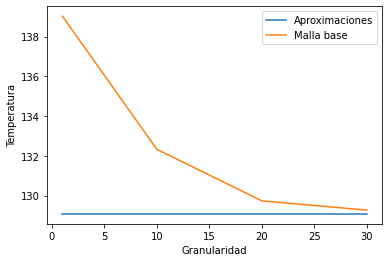

In [161]:
puntos = [punto1, punto2, punto3, punto4]
plt.plot([1,10,20,30], [punto_base]*4, label='Aproximaciones')
plt.plot([1,10,20,30], puntos[::-1], label='Malla base')
plt.xlabel('Granularidad')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

# Error

[0.19181672310298836, 0.6574296975836091, 3.2499699924890706, 9.9477805576052]


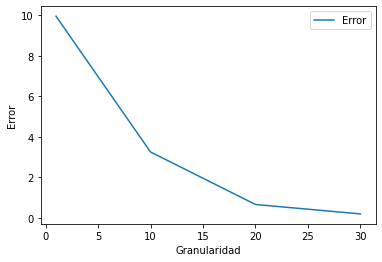

In [162]:
error = []
for punto in puntos:
    error.append(abs(punto_base - punto))
print(error)
plt.plot([1,10,20,30],error[::-1], label='Error')
plt.xlabel('Granularidad')
plt.ylabel('Error')
plt.legend()
plt.show()